#### Regression Analysis

# Predicting Real Estate Prices

In [1]:
''' This notebook explores data pertaining to Real Estate. The goal of this project is build a model that predicts transaction 
prices with an Average Error of under $70,000 by using Regression. '''

__author__ = 'Noel Joseph Padilla'
__email__ = 'nino.padilla87@gmail.com'

## <span style="color:RoyalBlue"> I. Import Libraries </span>

Import Relevant Libraries to be used for analysis.

In [2]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

# Seaborn for easier visualization
import seaborn as sns
sns.set_style('darkgrid')

## <span style="color:RoyalBlue"> II. Exploratory Analysis </span>

In Exploratory Analysis, our goal is to get to know the data. In this part, we would analyze numeric and categorical variables that make up the dataset.

In [3]:
# Load Relevant Dataset
df = pd.read_csv('real_estate_data.csv')

In [4]:
# Check dimensions
df.shape

(1883, 26)

In [5]:
# Check datatypes
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [6]:
# Check Initial observations
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [7]:
# Check Categorical Variables
df.dtypes[df.dtypes == 'object']

property_type     object
exterior_walls    object
roof              object
dtype: object

In [8]:
# Summarize Categorical Features
df.describe(include='object')

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


In [9]:
# Check Categorical Variables
df.dtypes[df.dtypes == 'int64']

tx_price              int64
beds                  int64
baths                 int64
sqft                  int64
year_built            int64
lot_size              int64
restaurants           int64
groceries             int64
nightlife             int64
cafes                 int64
shopping              int64
arts_entertainment    int64
beauty_spas           int64
active_life           int64
tx_year               int64
dtype: object

In [10]:
# Summarize Numerical Features
df.describe(include='int64')

,tx_price,beds,baths,sqft,year_built,lot_size,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,2016.000000


In [11]:
# Check Correlation Between Features
df.corr()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


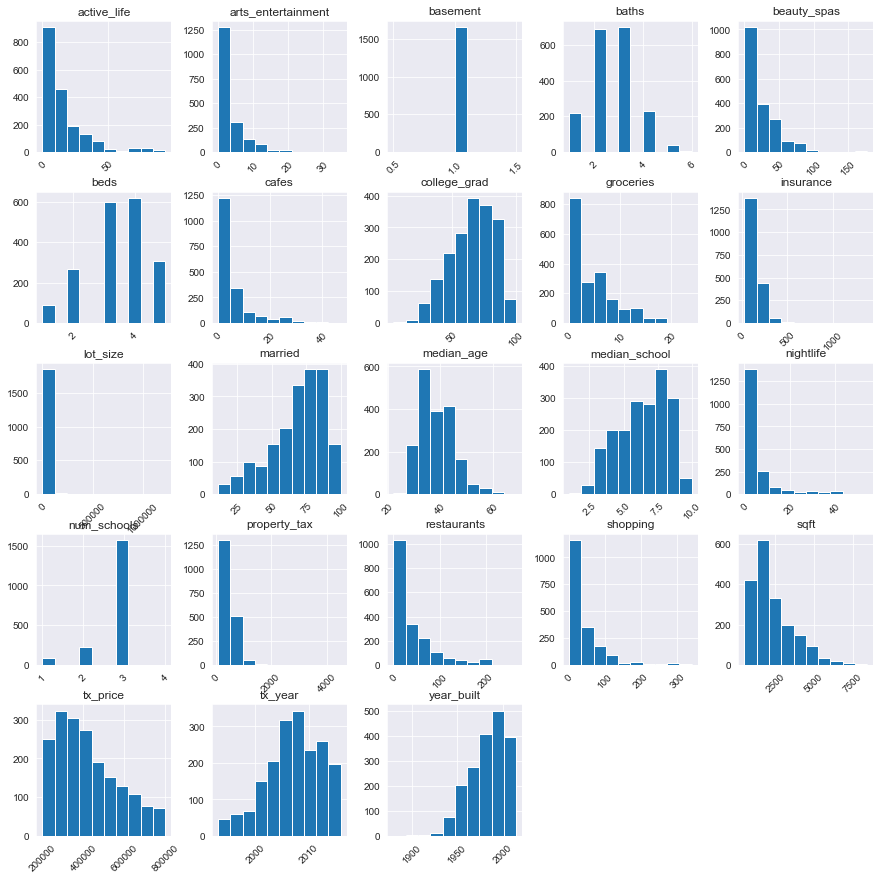

In [12]:
# Check Distribution Values of Dataset  
df.hist(figsize=(15,15), xrot=45)
plt.show()

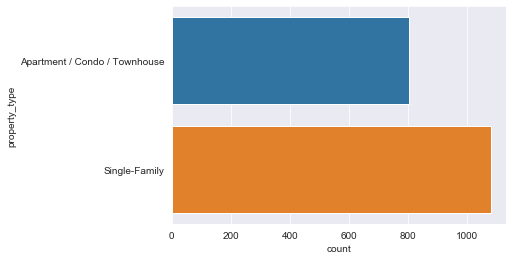

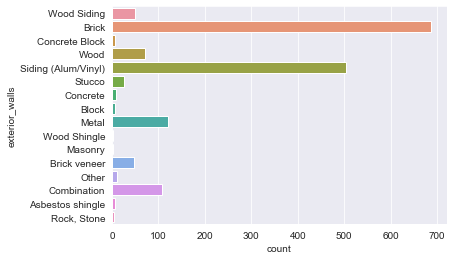

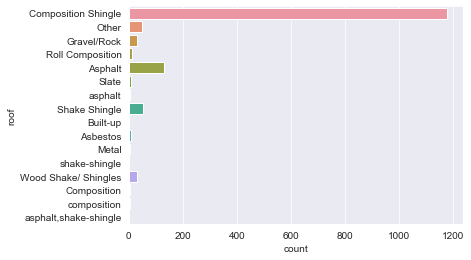

In [13]:
# Visualize Categorical Features Using Bar Plot
for feature in  df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

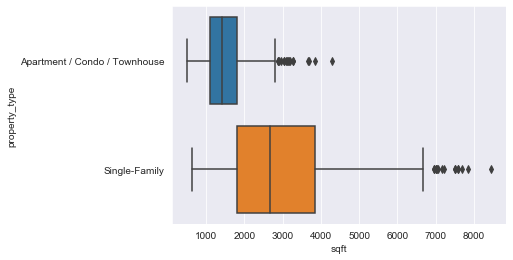

In [14]:
# Visualize Values for property_type and property size (sqft)
sns.boxplot(y='property_type', x='sqft', data=df)

Quick Analysis
* Single-Family homes are larger on average.
* Single-Family homes tend to vary greater in sizes
* Apartments/Condos/Townhouses tend to be smaller.

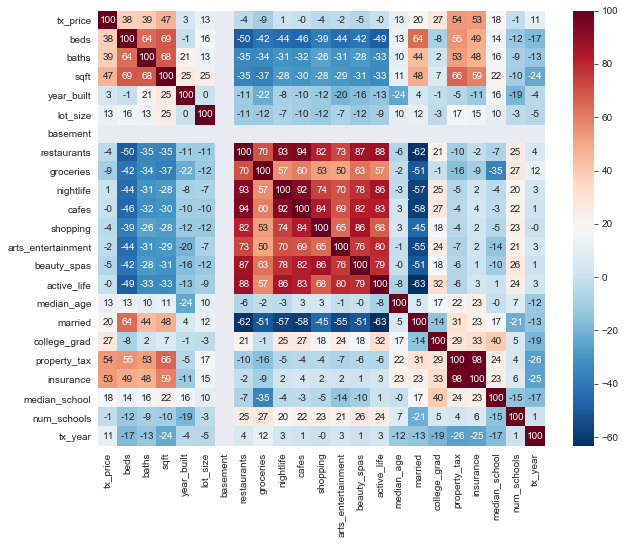

In [15]:
# Visualize a Correlation Heatmap
correlations = df.corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlations * 100,
            cmap='RdBu_r',
            annot=True,
            fmt='.0f')

plt.show()

## <span style="color:RoyalBlue"> III. Data Cleaning </span>

After exploring our data, we now move forward to Data Cleaning. Data Cleaning is the process of determining inaccurate or unreasonable data to improve the data quality by means of correcting or dropping perceived errors.

In [16]:
# Drop duplicates
df = df.drop_duplicates()
print( df.shape )

(1883, 26)


In [17]:
# Assign 0 to Missing Values in Numerical Variables

# 'Basement' Variable contains missing values therefore fill with 0
df.basement.fillna(0, inplace=True)
print(df.basement.unique())

[0. 1.]


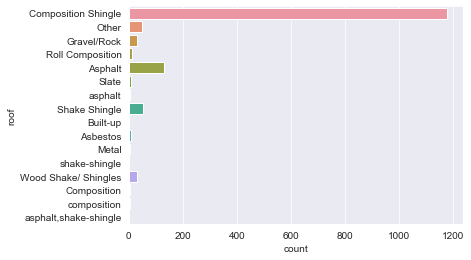

In [18]:
# Group Mistyped Categories in Categorical Variables

# Class distributions for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

In [19]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle',
                inplace=True)

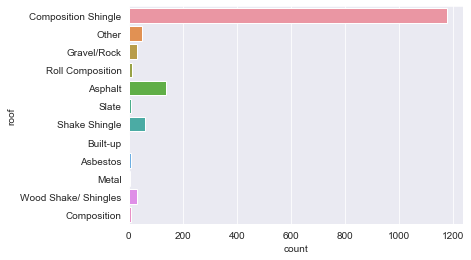

In [20]:
# Verify Updated Categories for 'roof'
sns.countplot(y='roof', data=df)
plt.show()

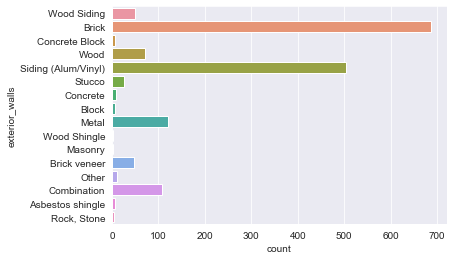

In [21]:
# Check class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)
plt.show()

In [22]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)

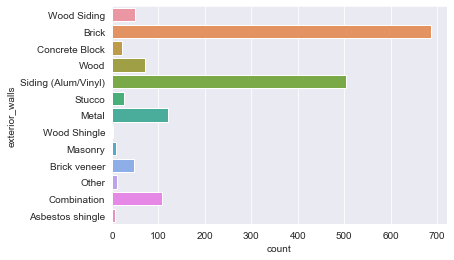

In [23]:
sns.countplot(y= 'exterior_walls', data=df)
plt.show()

In [24]:
# Check Categorical Features
df.dtypes[df.dtypes == 'object']

property_type     object
exterior_walls    object
roof              object
dtype: object

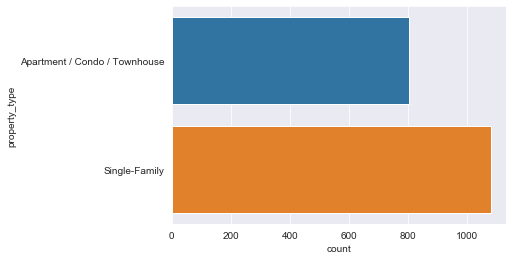

In [25]:
sns.countplot(y='property_type', data=df)

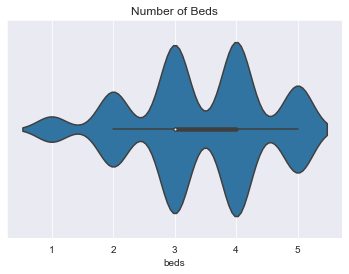

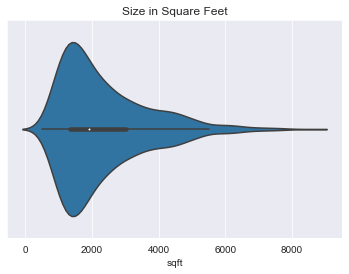

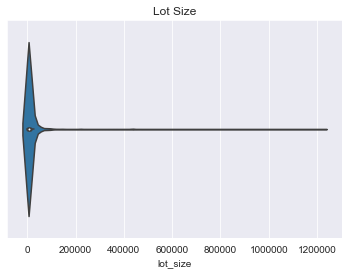

In [26]:
# Check for any potential outliers

#Violin plot of beds
sns.violinplot(df.beds)
plt.title('Number of Beds')
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.title('Size in Square Feet')
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.title('Lot Size')
plt.show()

* Among the three features, it appears that "lot_size" has a potential outlier upon looking at its long tail. Upon checking the largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. Since all the lot sizes are less than 500,000 sqft, we decided to remove those with lot_size greater than 500,000 sqft.

In [27]:
# Remove lot_size outliers
df = df[df.lot_size <= 500000]

# print length of df
print( len(df) )

1882


* We would be writing a loop function for labeling missing values in our categorical features to handle as many categorical features as necessary.

In [28]:
# Fill missing categorical values
for column in df.select_dtypes(include=['object']):
    df[column].fillna('Missing', inplace=True)

In [29]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

In [30]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [31]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index=None)

## <span style="color:RoyalBlue"> IV. Feature Engineering </span>

After cleaning our data, we proceed to Feature engineering where we apply domain knowledge to extract features from raw data to create relevant variables. These features can be used to improve the performance of our algorithms.

In [32]:
# Load Cleaned .csv file
df = pd.read_csv('cleaned_df.csv')
df.head()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,Missing,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,Missing,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [33]:
# Create indicator variable for properties with 2 beds and 2 baths
df['two_and_two'] = ((df.beds == 2) & (df.baths == 2)).astype(int)

In [34]:
# Create Variable that shows Property Age
df['property_age'] = df.tx_year - df.year_built

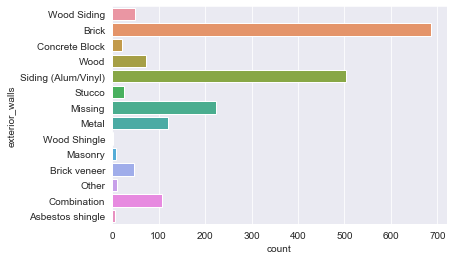

In [35]:
# Visualize exterior_walls using Bar Plot
sns.countplot(y='exterior_walls', data=df)
plt.show()

In [36]:
# Group Sparse Classes
df.exterior_walls.replace(['Wood Siding', 'Wood Shingle'], 'Wood', inplace=True)

In [37]:
# List of classes to group
other_exterior_walls = ['Concrete Block', 'Stucco', 'Masonry', 'Other', 'Asbestos shingle']

# Group other classes into 'Other'
df.exterior_walls.replace(other_exterior_walls, 'Other', inplace=True)

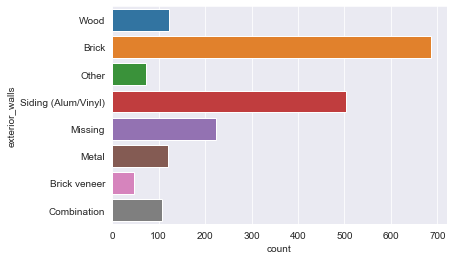

In [38]:
# Bar plot for exterior_walls
sns.countplot(y='exterior_walls', data=df)
plt.show()

[]

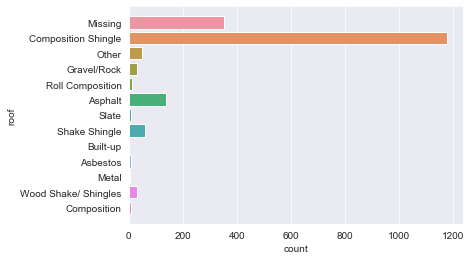

In [39]:
# # Visualize roofs using Bar Plot
sns.countplot(y = 'roof', data=df)
plt.plot()

In [40]:
# Group 'Composition' and 'Wood Shake/ Shingles' into 'Composition Shingle'
df.roof.replace(['Composition', 'Wood Shake/ Shingles'],
                'Composition Shingle', inplace=True)

In [41]:
# List of classes to group
other_roofs = ['Other', 'Gravel/Rock', 'Roll Composition', 'Slate', 'Built-up', 'Asbestos', 'Metal']

# Group other classes into 'Other'
df.roof.replace(other_roofs, 'Other', inplace=True)

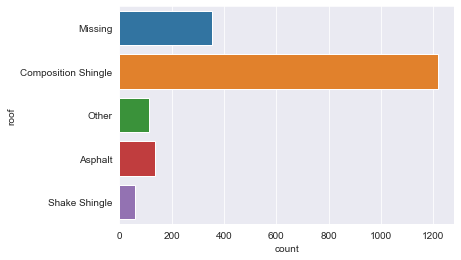

In [42]:
# Bar plot for roof
sns.countplot(y='roof', data=df)
plt.show()

In [43]:
# Since the point is to predict house prices, remove values where property_age is less than 0 (meaning not yet built)
df = df[df.property_age >= 0]

# Print number of rows in remaining dataframe
print(len(df))

1863


In [44]:
# Ensure that no values fall under 0 in property_age 
print(sum(df['property_age'] < 0))

0


Before proceeding to testing machine learning models, we need to first finalize the table to be used for modeling. The table would be used to perform our analyses or to build our models on it. 


Since machine learning algorithms cannot handle categorical features directly, we will create dummy variables for our categorical features. 

In [45]:
# Get dummy variables for Categorical Variables
pd.get_dummies( df, columns=['roof', 'exterior_walls', 'property_type'] ).head()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year,two_and_two,property_age,roof_Asphalt,roof_Composition Shingle,roof_Missing,roof_Other,roof_Shake Shingle,exterior_walls_Brick,exterior_walls_Brick veneer,exterior_walls_Combination,exterior_walls_Metal,exterior_walls_Missing,exterior_walls_Other,exterior_walls_Siding (Alum/Vinyl),exterior_walls_Wood,property_type_Apartment / Condo / Townhouse,property_type_Single-Family
0,295850,1,1,584,2013,0,0.0,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
1,216500,1,1,612,1965,0,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006,0,41,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,279900,1,1,615,1963,0,0.0,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012,0,49,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
3,379900,1,1,618,2000,33541,0.0,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005,0,5,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4,340000,1,1,634,1992,0,0.0,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002,0,10,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0


In [46]:
# Create new dataframe with dummy features
abt = pd.get_dummies(df, columns=['exterior_walls', 'roof', 'property_type'])

Since we used 'tx_year' and 'year_built' to create the 'property_age' feature, we can remove them. Removing 'tx_year' could also be a good idea because we don't want our model being overfit to the transaction year, since we'll be applying it to properties in the future. In other words, we want the model to focus on learning patterns from the other features.

In [47]:
# Drop 'tx_year' and 'year_built' from the dataset
abt.drop(['tx_year', 'year_built'], axis=1, inplace=True)

In [48]:
# Save analytical base table
abt.to_csv('analytical_base_table.csv', index=None)

## <span style="color:RoyalBlue"> V. Model Training </span>

Since we are now going to test out different models, it is crucial to import relevant machine learning packages.

In [49]:
# Import Regularized Regression algorithms
from sklearn.linear_model import Lasso, Ridge, ElasticNet

# Import Tree Ensemble algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [50]:
# Function for splitting training and test set
from sklearn.model_selection import train_test_split

In [51]:
# Load Analytical Base Table
df = pd.read_csv('analytical_base_table.csv')
print(df.shape)

(1863, 38)


Create separate objects for our (1) Target Variable and (2) Input Features

In [52]:
# Object for target variable
y = df.tx_price

# Object for input features
X = df.drop('tx_price', axis=1)

In [53]:
# Split X and y into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=1234)

In [54]:
# Import function for creating model pipelines
from sklearn.pipeline import make_pipeline

In [55]:
# For standardization
from sklearn.preprocessing import StandardScaler

In [56]:
# Create pipelines dictionary
pipelines = {
    'lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'enet'  : make_pipeline(StandardScaler(), ElasticNet(random_state=123))}

# Add Pipeline for Random Forest
pipelines['rf'] = make_pipeline(StandardScaler(),
                                RandomForestRegressor(random_state=123))

# Add Pipeline for Gradient Boost
# Add a pipeline for 'gb'
pipelines['gb'] = make_pipeline(StandardScaler(),
                                GradientBoostingRegressor(random_state=123))

In [57]:
# Lasso hyperparameters
lasso_hyperparameters = { 
    'lasso__alpha' : [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10] 
}

# Ridge hyperparameters
ridge_hyperparameters = { 
    'ridge__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]  
}

# Elastic Net hyperparameters
enet_hyperparameters = { 
    'elasticnet__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],                        
    'elasticnet__l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9]  }

In [58]:
# Random forest hyperparameters
rf_hyperparameters = { 
    'randomforestregressor__n_estimators' : [100, 200],
    'randomforestregressor__max_features': ['auto', 'sqrt', 0.33],
}

# Boosted tree hyperparameters
gb_hyperparameters = { 
    'gradientboostingregressor__n_estimators': [100, 200],
    'gradientboostingregressor__learning_rate' : [0.05, 0.1, 0.2],
    'gradientboostingregressor__max_depth': [1, 3, 5]
}

In [59]:
print( '{} observations in the training set.'.format( len(X_train) ) )
print( '{} observations in the test set.'.format( len(X_test) ) )

1490 observations in the training set.
373 observations in the test set.


In [60]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [61]:
X_test_new = scaler.transform(X_test)

In [62]:
# Check that we have all 5 model families, and that they are all pipelines
for key, value in pipelines.items():
    print( key, type(value) )

lasso <class 'sklearn.pipeline.Pipeline'>
ridge <class 'sklearn.pipeline.Pipeline'>
enet <class 'sklearn.pipeline.Pipeline'>
rf <class 'sklearn.pipeline.Pipeline'>
gb <class 'sklearn.pipeline.Pipeline'>


In [63]:
# Create hyperparameters dictionary
hyperparameters = {
    'rf' : rf_hyperparameters,
    'gb' : gb_hyperparameters,
    'lasso' : lasso_hyperparameters,
    'ridge' : ridge_hyperparameters,
    'enet' : enet_hyperparameters
}

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

lasso has been fitted.
ridge has been fitted.
enet has been fitted.
rf has been fitted.
gb has been fitted.


In [66]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

lasso 0.3063962386649499
ridge 0.31386284427254124
enet 0.34020041514888055
rf 0.45739317401955254
gb 0.4727921038282291


A model score of 1 is the best score. In our given models, the one with the highest "model.best_score" is the Random Forest. 

In [67]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

import pickle

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

In [68]:
for name, model in fitted_models.items():
    pred = model.predict(X_test)
    print( name )
    print( '--------' )
    print( 'R^2:', r2_score(y_test, pred ))
    print( 'MAE:', mean_absolute_error(y_test, pred))
    print()

lasso
--------
R^2: 0.40697575450947165
MAE: 84627.41409117387

ridge
--------
R^2: 0.40736291234523114
MAE: 84593.93980279399

enet
--------
R^2: 0.402549653248377
MAE: 86474.38108092017

rf
--------
R^2: 0.5552416349583756
MAE: 70676.64808310992

gb
--------
R^2: 0.5261359151003954
MAE: 72313.30179661962



**R-Squared** is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression. For this case, the model with the best r-squared score is the Random Forest model. 

**Mean Absolute Error** or (MAE) is the difference between the actual observation and the predicted observation. In the beginning, we stated that we are looking to design a model with an Average Error of under 70,000. Based on what we are looking for, the Random Forest is the model with the best MAE. 

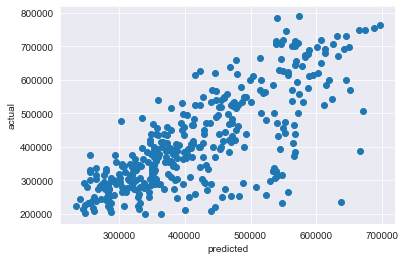

In [69]:
# Plot Predicted Values for tx_price using our Random Forest Model
rf_pred = fitted_models['rf'].predict(X_test)
plt.scatter(rf_pred, y_test)
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

In [70]:
import pickle

with open('final_model.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)